In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.color import rgb2gray, label2rgb
from skimage.filters import threshold_otsu
from skimage.morphology import area_opening, disk, binary_closing
from skimage.measure import find_contours, label, regionprops_table

In [3]:

folderpath = 'seeds/'
filename = folderpath + '14.6.jpg'
RGB = mpimg.imread(filename)
I = rgb2gray(RGB)
# Apply Otsu's method
global_threshold  = threshold_otsu(I)
BW = I < global_threshold
#Smoothing 
#Remove small areas
BW = area_opening(BW, area_threshold = 1000, connectivity=2)
# CLosing operation (Connects small patches of True pixels)
BW = binary_closing(BW, disk(5))
contours = find_contours(BW,0)
seed_num = len(contours)

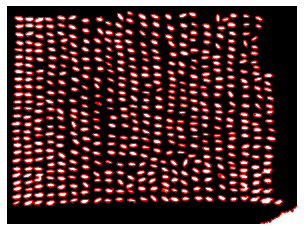

In [16]:
plt.imshow(BW, cmap = 'gray')
plt.axis('off')
for contour in contours:
    plt.plot(contour[:,1], contour[:,0], '-r', linewidth = 1)
plt.savefig('seeds_check.jpg')

In [1]:
import os as os
newpath = r'output/data/trial' 
if not os.path.exists(newpath):
    os.makedirs(newpath)